# Import (Libraries & Functions)

`代码参考自github`

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# One patient

In [2]:
path = "data/S1/S1.pkl"

with open(path, "rb") as f:
    data = pickle.load(f, encoding="latin-1")

In [3]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [4]:
data["questionnaire"]

{'WEIGHT': 78.0,
 'Gender': ' m',
 'AGE': 34,
 'HEIGHT': 182.0,
 'SKIN': 3,
 'SPORT': 6}

In [5]:
data["subject"]

'S1'

## Activity

In [6]:
activity = pd.DataFrame(data["activity"]).astype(int)
activity.columns = ["Activity"]
print(activity.shape)
activity.head()

(36848, 1)


,Activity
0,0
1,0
2,0
3,0
4,0


In [7]:
activity["Activity"].value_counts()

6    9420
0    9124
8    4756
5    3556
7    3016
1    2800
4    1648
3    1380
2    1148
Name: Activity, dtype: int64

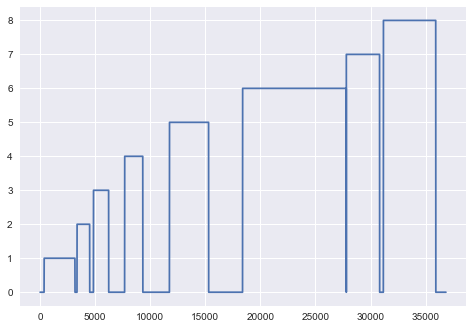

In [13]:
plt.style.use("seaborn")
plt.plot(np.arange(activity.shape[0]),activity)
plt.show()

- __Sitting (ID: 1)__: Sitting still while reading. The aim of this activity was to generate a motionartefact-free baseline.
- __Ascending and descending stairs (ID: 2)__: Climbing six floors up and going down again,
repeating this twice. This activity was carried out in the main building at our research
campus. Note: for subjects S1 and S2, going down was performed only once.
- __Table soccer (ID: 3)__: Playing table soccer, 1 vs. 1 with the supervisor of the data collection.
- __Cycling (ID: 4)__: Performed outdoors, around our research campus, following a defined route
of about 2km length with varying road conditions (gravel, paved).
- __Driving a car (ID: 5)__: This activity started at the parking ground of our research campus and
was carried out within the area nearby. Subjects followed a defined route which took about
15 minutes to complete. The route included driving on different streets in a small city as well
as driving on country roads.
- __Lunch break (ID: 6)__: This activity was carried out at the canteen of our research campus. The
activity included queuing and fetching food, eating, and talking at the table.
- __Walking (ID: 7)__: This activity was carried out within the premises of our research campus,
walking back from the canteen to the office, with some detour.
- __Working (ID: 8)__: Subjects returned to their desk and worked as if not participating in this
study. For each subject, work mainly consisted of working on a computer

In [ ]:
dic_activity = {1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"}

## Label

In [ ]:
label = pd.DataFrame(data["label"])
label

,0
0,49.611369
1,50.323992
2,52.708336
3,55.640794
4,57.658406
...,...
4598,74.058629
4599,80.442006
4600,84.004991
4601,85.796257


In [ ]:
label = pd.DataFrame(np.repeat(label.values,8,axis=0))
label.columns = ["Label"]
print(label.shape)
if(np.size(label, axis = 0) < np.size(activity, axis = 0)):
    mean = label.mean()
    while(np.size(label, axis = 0) < np.size(activity, axis = 0)):
        label = label.append(mean, ignore_index=True)
label

(36824, 1)


,Label
0,49.611369
1,49.611369
2,49.611369
3,49.611369
4,49.611369
...,...
36843,74.838901
36844,74.838901
36845,74.838901
36846,74.838901


## Signal Data

In [ ]:
signal = pd.DataFrame(data["signal"])
signal

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


### Chest

The modalities ‘EDA’, ‘EMG’ and ‘Temp’ only include dummy data and should thus be ignored.

In [ ]:
ACC = pd.DataFrame(signal["chest"].ACC)
display(ACC)
ACC = ACC.iloc[::175, :]
ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC.reset_index(drop = True, inplace=True)
ACC

,0,1,2
0,0.8564,-0.0678,-0.3656
1,0.8556,-0.0690,-0.3646
2,0.8520,-0.0702,-0.3642
3,0.8526,-0.0690,-0.3640
4,0.8526,-0.0698,-0.3654
...,...,...,...
6448395,0.8862,-0.1022,-0.2760
6448396,0.8866,-0.1036,-0.2766
6448397,0.8876,-0.1038,-0.2792
6448398,0.8862,-0.1016,-0.2782


,ACC_x,ACC_y,ACC_z
0,0.8564,-0.0678,-0.3656
1,0.8514,-0.0654,-0.3688
2,0.8514,-0.0662,-0.3708
3,0.8594,-0.0632,-0.3640
4,0.8510,-0.0674,-0.3694
...,...,...,...
36843,0.8956,-0.1158,-0.2526
36844,0.8888,-0.1062,-0.2684
36845,0.8802,-0.0966,-0.2938
36846,0.8842,-0.0962,-0.2820


In [ ]:
ECG = pd.DataFrame(signal["chest"].ECG)
ECG = ECG.iloc[::175, :]
ECG.reset_index(drop = True, inplace=True)
ECG

,0
0,0.015610
1,-0.015747
2,-0.008743
3,-0.339523
4,-0.089905
...,...
36843,-0.091507
36844,-0.159714
36845,0.074890
36846,-0.110779


In [ ]:
Resp = pd.DataFrame(signal["chest"].Resp)
Resp = Resp.iloc[::175, :]
Resp.columns = ["Resp"]
Resp.reset_index(drop = True, inplace=True)
Resp

,Resp
0,4.441833
1,4.876709
2,3.340149
3,0.740051
4,-1.475525
...,...
36843,-2.183533
36844,-1.872253
36845,-2.696228
36846,-3.175354


In [ ]:
chest = pd.concat([ACC], sort=False)
chest["Resp"] = Resp
chest["ECG"] = ECG
chest.reset_index(drop=True, inplace=True)
chest = chest.add_prefix('chest_')
chest

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG
0,0.8564,-0.0678,-0.3656,4.441833,0.015610
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905
...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779


### Wrist

In [ ]:
ACC = pd.DataFrame(signal["wrist"].ACC)
ACC = ACC.iloc[::8, :]
ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
ACC.reset_index(drop = True, inplace=True)
ACC

,ACC_x,ACC_y,ACC_z
0,-0.765625,-0.078125,0.671875
1,-0.765625,-0.078125,0.671875
2,-0.765625,-0.078125,0.671875
3,-0.750000,-0.078125,0.671875
4,-0.765625,-0.078125,0.671875
...,...,...,...
36843,-0.375000,-0.015625,0.937500
36844,-0.359375,-0.015625,0.953125
36845,-0.437500,-0.015625,0.906250
36846,-0.390625,-0.015625,0.921875


In [ ]:
EDA = pd.DataFrame(signal["wrist"].EDA)
EDA.columns = ["EDA"]
EDA

,EDA
0,4.722437
1,4.728843
2,4.718594
3,4.717312
4,4.713469
...,...
36843,3.199053
36844,3.186241
36845,3.170867
36846,3.159336


In [ ]:
BVP = pd.DataFrame(signal["wrist"].BVP)
BVP = BVP.iloc[::16, :]
BVP.columns = ["BVP"]
BVP.reset_index(drop = True, inplace=True)
BVP

,BVP
0,7.28
1,-11.36
2,-51.27
3,5.65
4,34.34
...,...
36843,22.62
36844,116.83
36845,-18.36
36846,-6.64


In [ ]:
TEMP = pd.DataFrame(signal["wrist"].TEMP)
TEMP.columns = ["TEMP"]
TEMP

,TEMP
0,32.13
1,32.16
2,32.16
3,32.16
4,32.16
...,...
36843,34.37
36844,34.37
36845,34.37
36846,34.37


In [ ]:
wrist = pd.concat([ACC], sort=False)
wrist["BVP"] = BVP
wrist["TEMP"] = TEMP
wrist.reset_index(drop = True, inplace=True)
wrist = wrist.add_prefix('wrist_')
wrist

,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP
0,-0.765625,-0.078125,0.671875,7.28,32.13
1,-0.765625,-0.078125,0.671875,-11.36,32.16
2,-0.765625,-0.078125,0.671875,-51.27,32.16
3,-0.750000,-0.078125,0.671875,5.65,32.16
4,-0.765625,-0.078125,0.671875,34.34,32.16
...,...,...,...,...,...
36843,-0.375000,-0.015625,0.937500,22.62,34.37
36844,-0.359375,-0.015625,0.953125,116.83,34.37
36845,-0.437500,-0.015625,0.906250,-18.36,34.37
36846,-0.390625,-0.015625,0.921875,-6.64,34.37


### Fusing both

In [ ]:
signals = chest.join(wrist)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16
...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37


In [ ]:
for k,v in data["questionnaire"].items() :
    signals[k] = v
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6


### Counting Rpeaks

We will cound for each 175 portion (0.25 sec since 700 is 1sec) the number of rpeaks during that period.

In [ ]:
rpeaks = data['rpeaks']
rpeaks

array([    240,    1174,    2128, ..., 6447292, 6447748, 6448224])

In [ ]:
counted_rpeaks = []
index = 0 # index of rpeak element
time = 175 # time portion
count = 0 # number of rpeaks

while(index < len(rpeaks)):
    rpeak = rpeaks[index]
    
    if(rpeak > time): # Rpeak appears after the time portion
        counted_rpeaks.append(count)
        count = 0
        time += 175
        
    else:
        count += 1
        index += 1
        
# The rpeaks will probably end before the time portion so we need to fill the last portions with 0
if(len(counted_rpeaks) < 36848):
    while(len(counted_rpeaks) < 36848):
        counted_rpeaks.append(0)

In [ ]:
peaks = pd.DataFrame(counted_rpeaks)
peaks.columns = ["Rpeaks"]
peaks

,Rpeaks
0,0
1,1
2,0
3,0
4,0
...,...
36843,0
36844,1
36845,0
36846,0


In [ ]:
signals = signals.join(peaks)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6,0
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6,1
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6,0
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6,0
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6,0
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6,1
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6,0
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6,0


### Fusing with Activity & Label

In [ ]:
signals = signals.join(activity)
signals = signals.join(label)
signals

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6,0,0,49.611369
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6,1,0,49.611369
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6,0,0,49.611369
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6,0,0,49.611369
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6,0,0,49.611369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36843,0.8956,-0.1158,-0.2526,-2.183533,-0.091507,-0.375000,-0.015625,0.937500,22.62,34.37,78.0,m,34,182.0,3,6,0,0,74.838901
36844,0.8888,-0.1062,-0.2684,-1.872253,-0.159714,-0.359375,-0.015625,0.953125,116.83,34.37,78.0,m,34,182.0,3,6,1,0,74.838901
36845,0.8802,-0.0966,-0.2938,-2.696228,0.074890,-0.437500,-0.015625,0.906250,-18.36,34.37,78.0,m,34,182.0,3,6,0,0,74.838901
36846,0.8842,-0.0962,-0.2820,-3.175354,-0.110779,-0.390625,-0.015625,0.921875,-6.64,34.37,78.0,m,34,182.0,3,6,0,0,74.838901


In [ ]:
signals['Subject'] = data["subject"]

## Visualisation

Text(0, 0.5, 'Temperature')

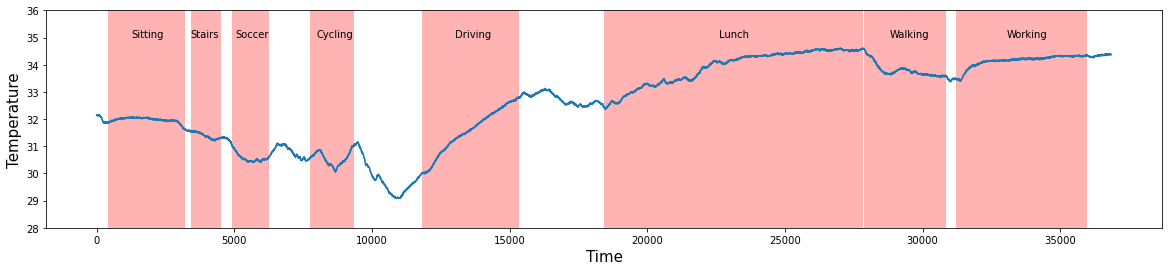

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 35, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

ax.set_ylim(top = 36, bottom = 28)
signals.loc[:, 'wrist_TEMP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Temperature", fontsize=15)

Text(0, 0.5, 'Heartrate')

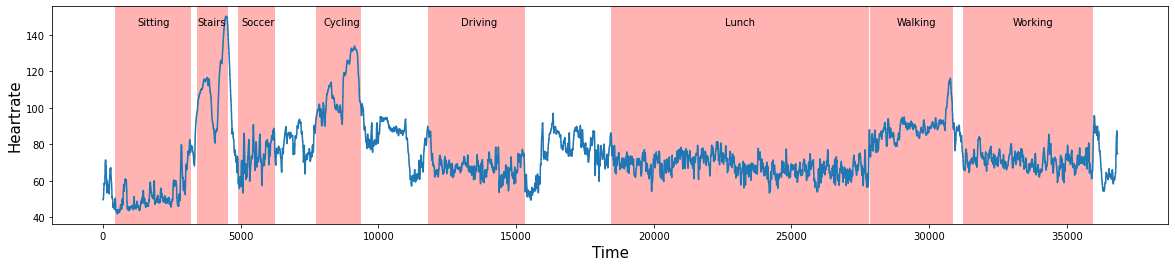

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 145, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1


signals.loc[:, 'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Heartrate", fontsize=15)

## Features

Since we're working only on one subject, his attributes don't matter to make a prediction.

In [ ]:
remove = ["Subject", "WEIGHT", "Gender", "AGE", "HEIGHT", "SKIN", "SPORT", "Activity"]
features = [column for column in list(signals.columns) if column not in remove]
features

['chest_ACC_x',
 'chest_ACC_y',
 'chest_ACC_z',
 'chest_Resp',
 'chest_ECG',
 'wrist_ACC_x',
 'wrist_ACC_y',
 'wrist_ACC_z',
 'wrist_BVP',
 'wrist_TEMP',
 'Rpeaks',
 'Label']

In [ ]:
signals.memory_usage().sum()/1024**2

5.48211669921875

## Train-test split

In [ ]:
X = signals[features].values
y = signals.Activity

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify = y)

# All patients : data agregation

Now let us join the data of multiple patients to train our model.

In [ ]:
def load_data(path):
    with open(path, "rb") as f:
        data = pickle.load(f, encoding="latin-1")
    
    signal = pd.DataFrame(data["signal"])
    ACC = pd.DataFrame(signal["chest"].ACC)
    ACC = ACC.iloc[::175, :]
    ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
    ACC.reset_index(drop = True, inplace=True)
    
    ECG = pd.DataFrame(signal["chest"].ECG)
    ECG = ECG.iloc[::175, :]
    ECG.reset_index(drop = True, inplace=True)
    
    Resp = pd.DataFrame(signal["chest"].Resp)
    Resp = Resp.iloc[::175, :]
    Resp.columns = ["Resp"]
    Resp.reset_index(drop = True, inplace=True)
    
    chest = pd.concat([ACC], sort=False)
    chest["Resp"] = Resp
    chest["ECG"] = ECG
    chest.reset_index(drop=True, inplace=True)
    chest = chest.add_prefix('chest_')
    
    ACC = pd.DataFrame(signal["wrist"].ACC)
    ACC = ACC.iloc[::8, :]
    ACC.columns = ["ACC_x", "ACC_y", "ACC_z"]
    ACC.reset_index(drop = True, inplace=True)
    
    EDA = pd.DataFrame(signal["wrist"].EDA)
    EDA.columns = ["EDA"]
    
    BVP = pd.DataFrame(signal["wrist"].BVP)
    BVP = BVP.iloc[::16, :]
    BVP.columns = ["BVP"]
    BVP.reset_index(drop = True, inplace=True)
    
    TEMP = pd.DataFrame(signal["wrist"].TEMP)
    TEMP.columns = ["TEMP"]
    
    wrist = pd.concat([ACC], sort=False)
    wrist["BVP"] = BVP
    wrist["TEMP"] = TEMP
    wrist.reset_index(drop = True, inplace=True)
    wrist = wrist.add_prefix('wrist_')
    
    signals = chest.join(wrist)
    for k,v in data["questionnaire"].items() :
        signals[k] = v
    
    rpeaks = data['rpeaks']
    counted_rpeaks = []
    index = 0 # index of rpeak element
    time = 175 # time portion
    count = 0 # number of rpeaks

    while(index < len(rpeaks)):
        rpeak = rpeaks[index]

        if(rpeak > time): # Rpeak appears after the time portion
            counted_rpeaks.append(count)
            count = 0
            time += 175

        else:
            count += 1
            index += 1
    # The rpeaks will probably end before the time portion so we need to fill the last portions with 0
    if(len(counted_rpeaks) < np.size(signals, axis = 0)):
        while(len(counted_rpeaks) < np.size(signals, axis = 0)):
            counted_rpeaks.append(0)
    peaks = pd.DataFrame(counted_rpeaks)
    peaks.columns = ["Rpeaks"]
    signals = signals.join(peaks)
    
    activity = pd.DataFrame(data["activity"]).astype(int)
    activity.columns = ["Activity"]
    signals = signals.join(activity)
    
    label = pd.DataFrame(data["label"])

    label = pd.DataFrame(np.repeat(label.values,8,axis=0))
    label.columns = ["Label"]
    if(np.size(label, axis = 0) < np.size(activity, axis = 0)):
        mean = label.mean()
        while(np.size(label, axis = 0) < np.size(activity, axis = 0)):
            label = label.append(mean, ignore_index=True)
    
    signals = signals.join(label)
    
    signals['Subject'] = data["subject"]
    return signals

In [ ]:
dataframes = {"d1" : signals}
for i in range(2,16):
    dataframes["d" + str(i)] = load_data("data/S" + str(i) + "/S" + str(i) + ".pkl")
dataframes.keys() 

dict_keys(['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15'])

In [ ]:
df = dataframes["d1"]
for i in range(2,16):
    df = df.append(dataframes["d" + str(i)])
df.shape

(517956, 20)

In [ ]:
df.memory_usage().sum()/1024**2

81.00965881347656

In [ ]:
## 保存，以后就不用别的dataFrame了
df.to_csv("data/data_1.csv",index=False)